![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [57]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [59]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [62]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [64]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

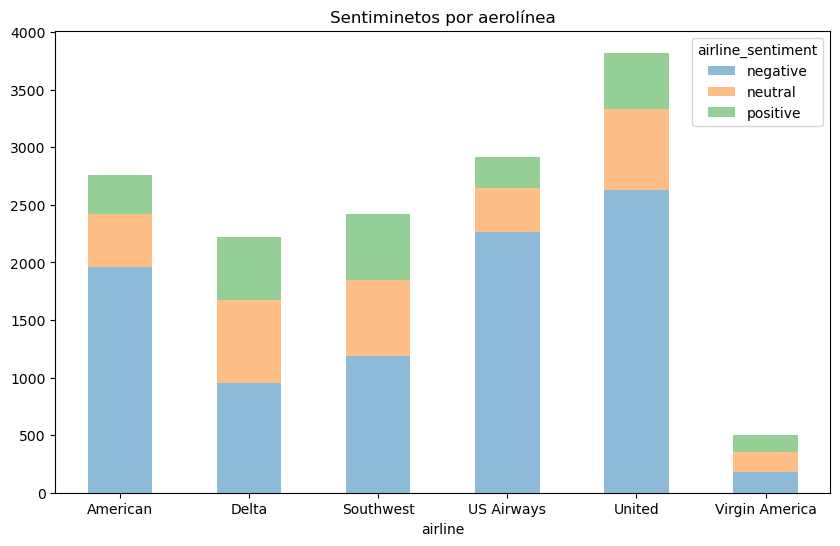

In [66]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")
plt.show()

### Liberias y Variables de interés y predicción

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

In [71]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [73]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [76]:
# Celda 1
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
rf_cv = RandomForestClassifier()
rf_cv.fit(X_train_cv, y_train)
y_pred_cv = rf_cv.predict(X_test_cv)
accuracy_cv = rf_cv.score(X_test_cv, y_test)
print(f'El Accuracy del modelo Random Forest con CountVectorizer es: {accuracy_cv:.2%}')

El Accuracy del modelo Random Forest con CountVectorizer es: 76.92%


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [78]:
# Celda 2
vect_sw = CountVectorizer(stop_words="english")
X_dtm_sw_train = vect_sw.fit_transform(X_train)
X_dtm_sw_test = vect_sw.transform(X_test)
print(f"La cantidad de palabras en la matriz son \n{X_dtm_sw_train.shape[1]:,.0f}")
rf_sw = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sw.fit(X_dtm_sw_train, y_train)
y_pred_sw = rf_sw.predict(X_dtm_sw_test)
accuracy_sw = rf_sw.score(X_dtm_sw_test, y_test)
print(f"El accuracy del modelo es {accuracy_sw:.2%}")

La cantidad de palabras en la matriz son 
11,777
El accuracy del modelo es 76.18%


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [81]:
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

wpt = WordPunctTokenizer()
wordnet_lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...


In [82]:
def lemmatize_verbs(text):
    tokens = wpt.tokenize(text)
    lemmas = [wordnet_lemmatizer.lemmatize(tok, pos='v') for tok in tokens]
    return " ".join(lemmas)

X_train_lem = X_train.apply(lemmatize_verbs)
X_test_lem  = X_test.apply(lemmatize_verbs)

vect_lem = CountVectorizer()
X_dtm_lem_train = vect_lem.fit_transform(X_train_lem)
X_dtm_lem_test  = vect_lem.transform(X_test_lem)

print(f"La cantidad de palabras en la matriz son \n{X_dtm_lem_train.shape[1]:,.0f}")

vect_lem= CountVectorizer()
X_dtm_lem_train = vect_lem.fit_transform(X_train_lem)
X_dtm_lem_test  = vect_lem.transform(X_test_lem)
rf_lem = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lem.fit(X_dtm_lem_train,y_train)
y_pred_lem = rf_lem.predict(X_dtm_lem_test)
accuracy_lm = rf_lem.score(X_dtm_lem_test, y_test)
print(f"El accuracy del modelo es {accuracy_lm:.2%}")

La cantidad de palabras en la matriz son 
10,981
El accuracy del modelo es 77.42%


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [89]:
# Celda 4
X_train_lema=X_train.apply(lemmatize_verbs)
X_test_lema=X_test.apply(lemmatize_verbs)

vector=CountVectorizer(stop_words='english')
X_train_vect=vector.fit_transform(X_train_lema)
X_test_vect=vector.transform(X_test_lema)

rf_celda4=RandomForestClassifier(n_estimators=80, random_state=42)
rf_celda4.fit(X_train_vect, y_train)
y_pred_celda4=rf_celda4.predict(X_test_vect)

metrica=accuracy_score(y_test, y_pred_celda4)
print(f"El accuracy del modelo es: {metrica:.2f} %")

El accuracy del modelo es: 0.77 %


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

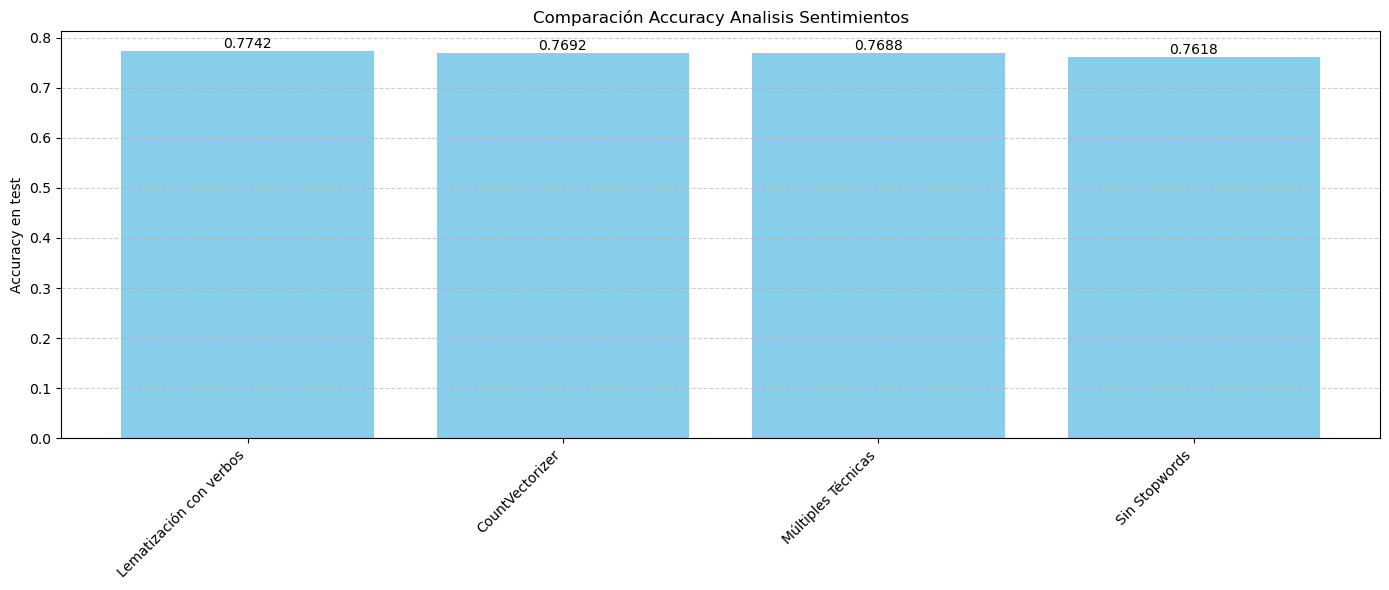

In [99]:
# Celda 5
labels = ['CountVectorizer','Sin Stopwords','Lematización con verbos', 'Múltiples Técnicas']
accuracy_values = [accuracy_cv, accuracy_sw,accuracy_lm,metrica]

labels_sorted, accuracy_values = zip(*sorted(zip(labels, rmse_values), key=lambda x: x[1], reverse=True))


plt.figure(figsize=(14, 6))
bars = plt.bar(labels_sorted, accuracy_values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy en test')
plt.title('Comparación Accuracy Analisis Sentimientos')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval , f'{yval:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### CONCLUSIONES

De acuerdo con los resultados el mejor modelo fue randomforest con countvectorized + lematización con verbos con un desempeño accuracy de 77.42% y el modelo que presento un menor desempeño fue randomforest con eliminación de stopwords con un desempeño accuracy de 76.18%. Sin embargo, la diferencia en cuanto a desempeño no es significativa entre el mejor y el peor modelo.

**Ventajas Lematización con Verbos**
- Se realiza una reducción de palabras a su forma base permitiendo que el modelo se desempeñe mejor al no perder semántica.
- Mejora la eficiencia del modelo al disminuir la cantidad de tokens únicos.
- Una lematización correcta permite que los verbos (especialmente en un enfoque de clasificación de sentimientos como el que se está modelando) tengan la carga emocional correcta para una mejor clasificación.
- Para los datos de test, este modelo presentó el mejor desempeño para predecir los sentimientos sobre los tweets.
  

**Desventajas Sin Stopwords**
- Al realizar una eliminación de stopwords sin contexto semántico de la tarea, se eliminan palabras clave que son importantes especialmente para la clasificación de sentimientos.
- Justamente la elimincación de palabras clave hace que el desempeño para clasificar los tweets disminuye frente a otras técnicas
- Al clasificar tweets que tienen como característica una restricción en el número de palabras, los usuarios suelen recortar las frases o limitar el uso de ciertas palabras. Esta condición hace que eliminar palabras tome una relevancia mayor en el desempeño del modelo.